# Demo: `cgibands.py`
This notebook demonstrates how to use the `cgibands` module to compute band-averaged fluxes from input spectra. You can use:

- Official Roman CGI transmission curves
- Custom-defined wavelength bands
- Optional stellar spectra to calculate flux ratios (Fp/Fs)

---

## Setup

Before launching this notebook:
Download the CGI transmission curves from  
https://roman.ipac.caltech.edu/page/additional-coronagraph-instrument-parameters-model-and-data-html#Color_Filter_Curves

You can edit line 11 of cgi_bands with your folder location, DEFAULT_FILTER_DIR = 'C:/Research/Projects/Roman/Data/Filters' # Replace this with your directory for the CGI color contrast file. If not, pass cgi_bands your the path to your directory in the call assigned to the variable, filter_folder.


In [19]:
import numpy as np
from astropy import units as u
from cgibands import compute_cgibands


--- Band 1 ---
  Wavelength Range   : 545.5 – 601.5 nm
  Mean Planetary Flux: 1.24e-02 [W/m2/um]

--- Band 2 ---
  Wavelength Range   : 604.0 – 714.5 nm
  Mean Planetary Flux: 5.78e-01 [W/m2/um]

--- Band 3 ---
  Wavelength Range   : 669.0 – 790.5 nm
  Mean Planetary Flux: 6.34e-01 [W/m2/um]

--- Band 4 ---
  Wavelength Range   : 777.5 – 873.5 nm
  Mean Planetary Flux: 2.76e-02 [W/m2/um]


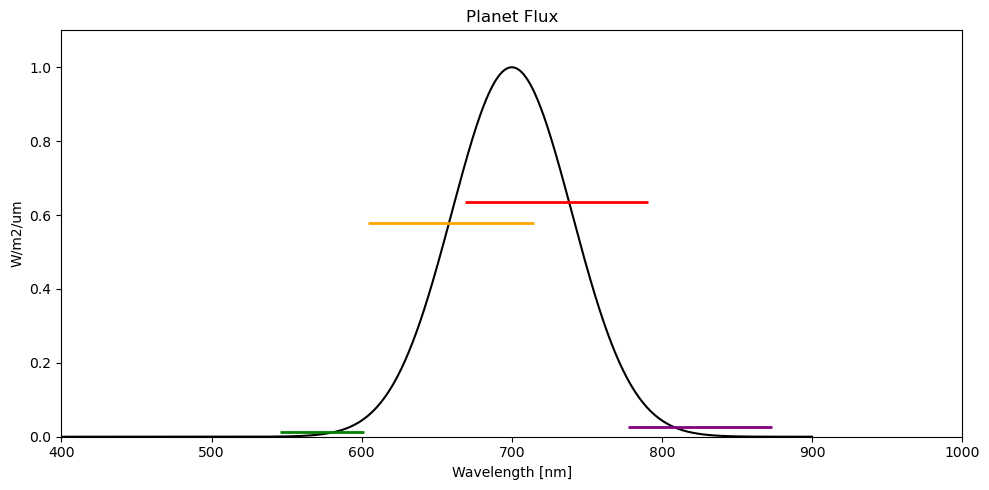

In [20]:
# Basic usage example with dummy Gaussian-shaped spectrum
"""
This is a quick-start demo using artificial (dummy) Gaussian-shaped spectral data.
This is helpful for testing the code pipeline before applying to real data.
"""

# Dummy Gaussian-shaped flux
wavelengths_nm = np.linspace(400, 900, 1000)
flux = np.exp(-((wavelengths_nm - 700)**2) / (2 * 40**2))

# Compute CGI band-averaged fluxes
compute_cgibands(wavelengths_nm, flux,
                 wavelength_unit='nm',
                 flux_unit='W/m2/um',
                 plot=True)


--- Band 1 ---
  Wavelength Range   : 545.5 – 601.5 nm
  Mean Planetary Flux: 1.24e-02 [W m^-2 um^-1]

--- Band 2 ---
  Wavelength Range   : 604.0 – 714.5 nm
  Mean Planetary Flux: 5.78e-01 [W m^-2 um^-1]

--- Band 3 ---
  Wavelength Range   : 669.0 – 790.5 nm
  Mean Planetary Flux: 6.34e-01 [W m^-2 um^-1]

--- Band 4 ---
  Wavelength Range   : 777.5 – 873.5 nm
  Mean Planetary Flux: 2.76e-02 [W m^-2 um^-1]


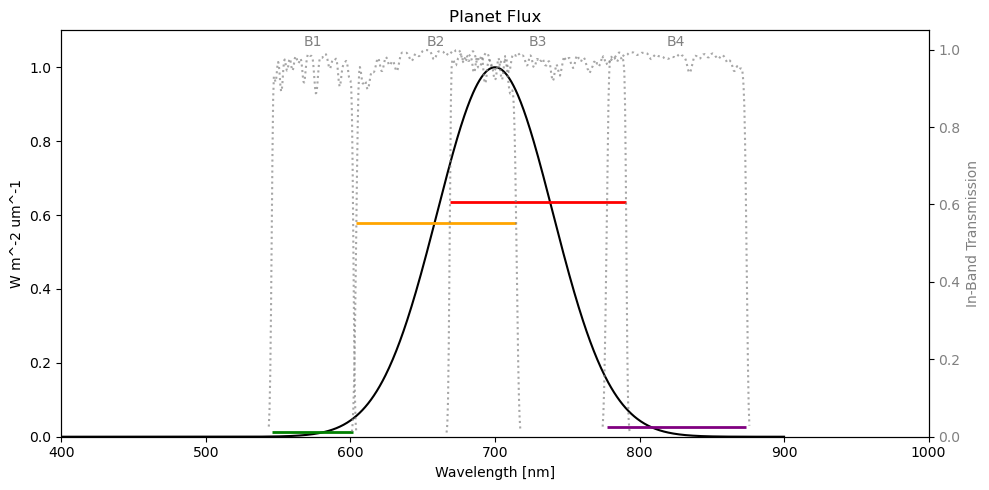

In [21]:
# Use Alternative Units
"""
cgibands accepts most common units for wavelength and flux formatted in a variety of ways, as long as it can be recognized by Astropy
set show_color_filter_curves=True to plot the transmission curves for each band as measured by Materion in Fall 2021
"""

wavelength_A = (wavelengths_nm * u.nm).to(u.Angstrom).value

compute_cgibands(wavelength_A, flux,
                 wavelength_unit='Angstrom',
                 flux_unit='W m^-2 um^-1',
                 plot=True,
                 show_color_filter_curves=True)


--- Band 1 ---
  Wavelength Range   : 546.6 – 603.7 nm
  Mean Planetary Flux: 1.41e-02 [W/m2/um]

--- Band 2 ---
  Wavelength Range   : 604.2 – 715.8 nm
  Mean Planetary Flux: 5.79e-01 [W/m2/um]

--- Band 3 ---
  Wavelength Range   : 675.3 – 784.4 nm
  Mean Planetary Flux: 6.56e-01 [W/m2/um]

--- Band 4 ---
  Wavelength Range   : 783.9 – 866.0 nm
  Mean Planetary Flux: 2.22e-02 [W/m2/um]


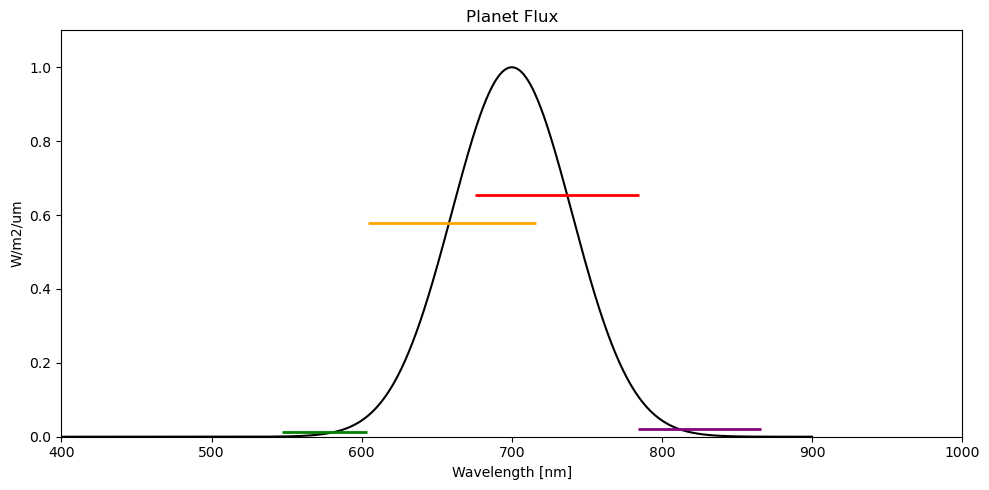

In [22]:
# User-defined bands can be used to calculate band pass averages
"""
You can manually define your own wavelength bands using a Python dictionary, where:
Each key is a band label (e.g., 'B1', 'B2', etc.)
Each value is a tuple of the lower and upper wavelength limits in nanometers

Example:
Below, we use previously published CGI band centers and widths to compute custom wavelength ranges.
You can also just provide any two wavelengths (start, end) directly.
"""

custom_bands = {
    'B1': (575 - (575*0.1)/2, 575 + (575*0.1)/2),
    'B2': (660 - (660*0.17)/2, 660 + (660*0.17)/2),
    'B3': (730 - (730*0.15)/2, 730 + (730*0.15)/2),
    'B4': (825 - (825*0.1)/2, 825 + (825*0.1)/2)
}

compute_cgibands(wavelengths_nm, flux,
                 wavelength_unit='nm',
                 flux_unit='W/m2/um',
                 custom_bands=custom_bands,
                 plot=True)


--- Band 1 ---
  Wavelength Range   : 545.5 – 601.5 nm
  Mean Planetary Flux: 8.93e-12 [W / (m2 um)]

--- Band 2 ---
  Wavelength Range   : 604.0 – 714.5 nm
  Mean Planetary Flux: 6.89e-12 [W / (m2 um)]

--- Band 3 ---
  Wavelength Range   : 669.0 – 790.5 nm
  Mean Planetary Flux: 5.63e-12 [W / (m2 um)]

--- Band 4 ---
  Wavelength Range   : 777.5 – 873.5 nm
  Mean Planetary Flux: 4.44e-12 [W / (m2 um)]


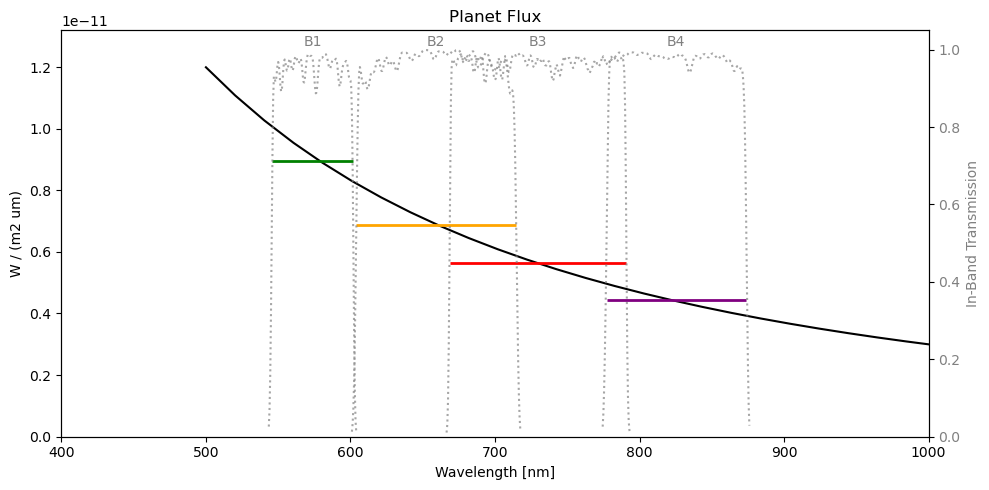

In [23]:
# Convert spectra from F_nu units (e.g., Jy) to F_lambda before computing band-averaged values
"""
The cgibands function expects flux in units of F_lambda (per unit wavelength).

If your flux is in frequency units (F_nu) such as Jy or erg/s/cm²/Hz, convert it first:
- Use the provided fnu2flam utility
- You can specify the input and output units (e.g., 'Jy' → 'W / (m2 um)')

This ensures the flux can be integrated correctly over wavelength bands.
"""

from fnu2flam import convert_fnu_to_flambda

wavelength_um = np.linspace(0.5, 2.5, 100)  # microns
flux_jy = np.ones_like(wavelength_um) * 1.0  # constant 1 Jy

# Convert to F_lambda
w_out, f_out = convert_fnu_to_flambda(wavelength_um, flux_jy,
                                      flux_unit='Jy',
                                      wavelength_unit='um',
                                      output_unit='W / (m2 um)')

compute_cgibands(w_out, f_out,
                 wavelength_unit='um',
                 flux_unit='W / (m2 um)',
                 plot=True,
                 show_color_filter_curves=True)


--- Band 1 ---
  Wavelength Range   : 545.5 – 601.5 nm
  Mean Planetary Flux: 3.47e+00 [erg/cm2/s/A]

--- Band 2 ---
  Wavelength Range   : 604.0 – 714.5 nm
  Mean Planetary Flux: 1.86e+01 [erg/cm2/s/A]

--- Band 3 ---
  Wavelength Range   : 669.0 – 790.5 nm
  Mean Planetary Flux: 4.67e+01 [erg/cm2/s/A]

--- Band 4 ---
  Wavelength Range   : 777.5 – 873.5 nm
  Mean Planetary Flux: 1.51e+02 [erg/cm2/s/A]


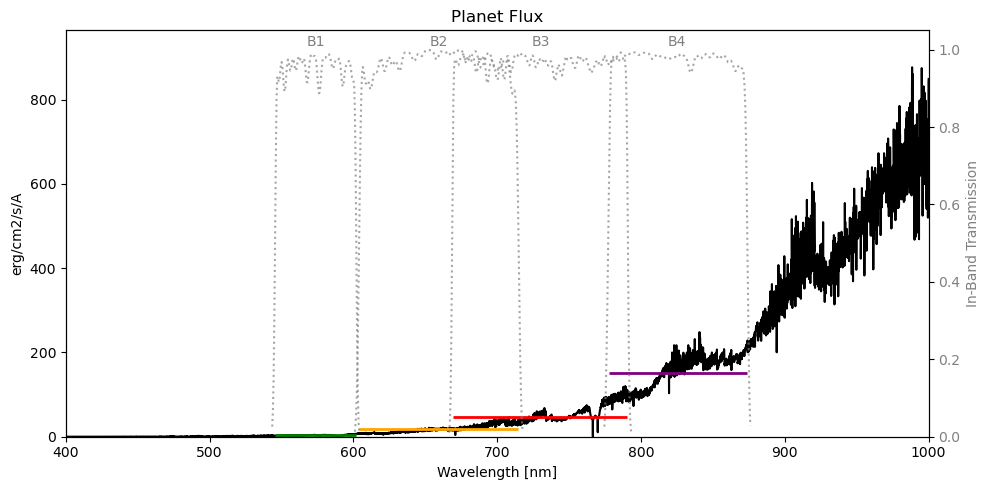

In [24]:
# Load a planetary atmosphere spectrum from BT-Settl and compute CGI band fluxes
"""
This example shows how to apply cgibands to real model spectra from BT-Settl.

- Read in planetary spectra from file using read_BT_spectrum
- Provide wavelength and flux units explicitly
- Plot band-averaged fluxes across the Roman CGI filters
"""

import os
from read_BT_spectrum import read_BT_spectrum

BTStl_dir = r"C:\Research\Projects\Roman\Data\BTStl"
BTsettl_file = "lte014-3.5-0.0.BT-Settl.7.dat.txt"
filepath = os.path.join(BTStl_dir, BTsettl_file)

wvp, fp = read_BT_spectrum(filepath)

compute_cgibands(wvp, fp,
                 wavelength_unit='Angstrom',
                 flux_unit='erg/cm2/s/A',
                 plot=True,
                 show_color_filter_curves=True)


--- Band 1 ---
  Wavelength Range   : 545.5 – 601.5 nm
  Mean Planetary Flux: 3.47e+00 [erg/cm2/s/A]
  Mean Stellar Flux  : 2.60e+07 [erg/cm2/s/A]
  (R_p / R_s)^2      : 3.34e-03
  Flux Ratio (Fp/Fs) : 4.45e-10

--- Band 2 ---
  Wavelength Range   : 604.0 – 714.5 nm
  Mean Planetary Flux: 1.86e+01 [erg/cm2/s/A]
  Mean Stellar Flux  : 1.88e+07 [erg/cm2/s/A]
  (R_p / R_s)^2      : 3.34e-03
  Flux Ratio (Fp/Fs) : 3.30e-09

--- Band 3 ---
  Wavelength Range   : 669.0 – 790.5 nm
  Mean Planetary Flux: 4.67e+01 [erg/cm2/s/A]
  Mean Stellar Flux  : 1.48e+07 [erg/cm2/s/A]
  (R_p / R_s)^2      : 3.34e-03
  Flux Ratio (Fp/Fs) : 1.05e-08

--- Band 4 ---
  Wavelength Range   : 777.5 – 873.5 nm
  Mean Planetary Flux: 1.51e+02 [erg/cm2/s/A]
  Mean Stellar Flux  : 1.05e+07 [erg/cm2/s/A]
  (R_p / R_s)^2      : 3.34e-03
  Flux Ratio (Fp/Fs) : 4.82e-08


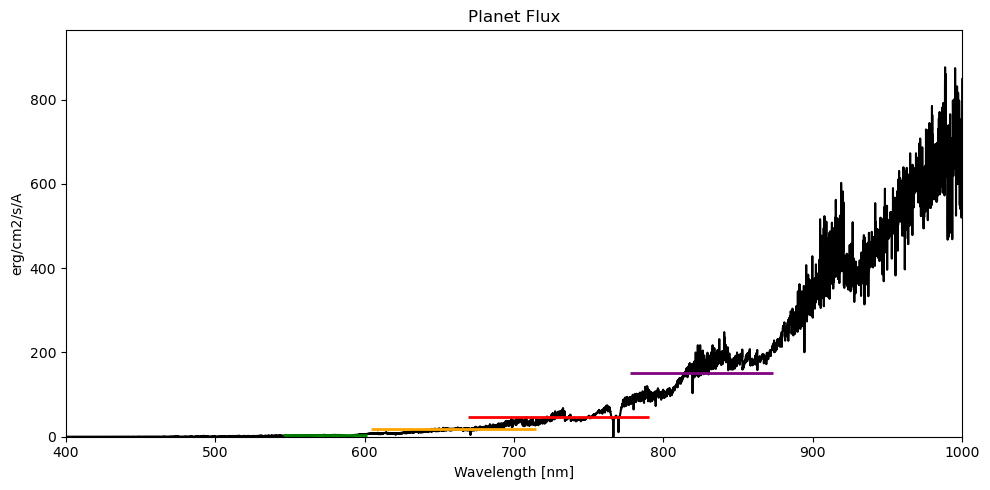

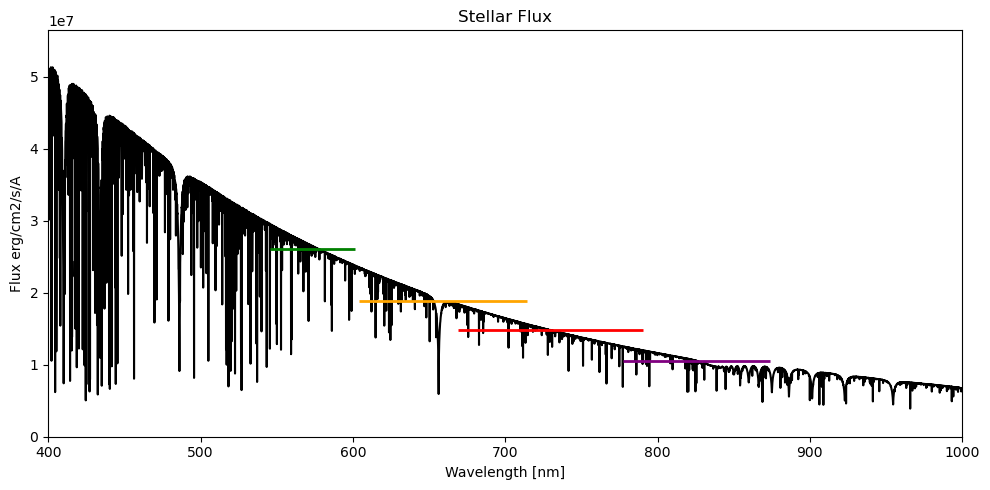

In [25]:
# Load a stellar spectrum and compute the planet-to-star flux ratio (Fp/Fs) in each CGI band
"""
This example extends the analysis to include a stellar spectrum for computing flux ratios:

- Loads a BT-NextGen stellar model spectrum
- Computes band-averaged stellar flux values
- Calculates Fp/Fs using the stellar and planetary band-averaged fluxes
- Accounts for the ratio of planet and star radii: Fp/Fs = (Rp/Rs)^2 × (Fp_lambda / Fs_lambda)

Inputs:
- stellar_wavelength and stellar_flux arrays
- Their associated units (e.g., 'Angstrom', 'erg/cm2/s/A')
- planet_radius (in R_jup) and stellar_radius (in R_sun)

If stellar radius or planet radius is omitted, the code will skip Fp/Fs calculation and notify you.
"""


BTNG_dir  = r"C:\Research\Projects\Roman\Data\BTNextgen"
BTNG_file = "lte076-4.0-0.0.BT-NextGen.7.dat.txt"
filepath = os.path.join(BTNG_dir, BTNG_file)

stellar_wvp, stellar_fp = read_BT_spectrum(filepath)

radius_star = 1.44  # in solar radii
radius_planet = 0.81  # in Jupiter radii

compute_cgibands(wvp, fp,
                 flux_unit='erg/cm2/s/A',
                 wavelength_unit='Angstrom',
                 stellar_wavelength=stellar_wvp,
                 stellar_flux=stellar_fp,
                 stellar_wavelength_unit="Angstrom",
                 stellar_flux_unit="erg/cm2/s/A",
                 stellar_radius=radius_star,
                 planet_radius=radius_planet,
                 plot=True)